<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understnding" data-toc-modified-id="Business-Understnding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understnding</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Research-Questions" data-toc-modified-id="Research-Questions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Research Questions</a></span></li><li><span><a href="#Main-Objective" data-toc-modified-id="Main-Objective-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Main Objective</a></span></li><li><span><a href="#Specific-Objectives" data-toc-modified-id="Specific-Objectives-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Specific Objectives</a></span></li><li><span><a href="#Metrics-of-success" data-toc-modified-id="Metrics-of-success-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Metrics of success</a></span></li></ul></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Rating-Value-Counts" data-toc-modified-id="Rating-Value-Counts-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Rating Value Counts</a></span></li><li><span><a href="#Top-Most-Watched-Movies" data-toc-modified-id="Top-Most-Watched-Movies-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Top Most Watched Movies</a></span></li><li><span><a href="#Top-Most-Rated-Movies" data-toc-modified-id="Top-Most-Rated-Movies-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Top Most Rated Movies</a></span></li><li><span><a href="#Genre-Counts." data-toc-modified-id="Genre-Counts.-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Genre Counts.</a></span></li><li><span><a href="#Top-Active-Users." data-toc-modified-id="Top-Active-Users.-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Top Active Users.</a></span></li></ul></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Content-Based-Recommender-Systems" data-toc-modified-id="Content-Based-Recommender-Systems-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Content-Based Recommender Systems</a></span></li><li><span><a href="#Collaborative-Filtering" data-toc-modified-id="Collaborative-Filtering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Collaborative Filtering</a></span><ul class="toc-item"><li><span><a href="#Neighborhood-Based-Models." data-toc-modified-id="Neighborhood-Based-Models.-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Neighborhood-Based Models.</a></span></li><li><span><a href="#Model-Based-Models" data-toc-modified-id="Model-Based-Models-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Model Based Models</a></span></li></ul></li><li><span><a href="#Hybrid-Recommender-Systems" data-toc-modified-id="Hybrid-Recommender-Systems-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hybrid Recommender Systems</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

# Hybrid Movie Recommendation System

![picture](Images/image2.jpeg)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understnding" data-toc-modified-id="Business-Understnding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understnding</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Research-Questions" data-toc-modified-id="Research-Questions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Research Questions</a></span></li><li><span><a href="#Main-Objective" data-toc-modified-id="Main-Objective-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Main Objective</a></span></li><li><span><a href="#Specific-Objectives" data-toc-modified-id="Specific-Objectives-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Specific Objectives</a></span></li><li><span><a href="#Metrics-of-success" data-toc-modified-id="Metrics-of-success-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Metrics of success</a></span></li></ul></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Rating-Value-Counts" data-toc-modified-id="Rating-Value-Counts-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Rating Value Counts</a></span></li><li><span><a href="#Top-Most-Watched-Movies" data-toc-modified-id="Top-Most-Watched-Movies-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Top Most Watched Movies</a></span></li><li><span><a href="#Top-Most-Rated-Movies" data-toc-modified-id="Top-Most-Rated-Movies-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Top Most Rated Movies</a></span></li><li><span><a href="#Top-Active-Users." data-toc-modified-id="Top-Active-Users.-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Top Active Users.</a></span></li></ul></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Content-Based-Recommender-Systems" data-toc-modified-id="Content-Based-Recommender-Systems-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Content-Based Recommender Systems</a></span></li><li><span><a href="#Collaborative-Filtering" data-toc-modified-id="Collaborative-Filtering-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Collaborative Filtering</a></span><ul class="toc-item"><li><span><a href="#Neighborhood-Based-Models." data-toc-modified-id="Neighborhood-Based-Models.-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Neighborhood-Based Models.</a></span></li><li><span><a href="#Model-Based-Models" data-toc-modified-id="Model-Based-Models-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Model Based Models</a></span></li></ul></li><li><span><a href="#Hybrid-Recommender-Systems" data-toc-modified-id="Hybrid-Recommender-Systems-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Hybrid Recommender Systems</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></div>

##  Business Understnding
### Introduction
Movies are a popular, widely spread, and recognized form of entertainment that has evolved drastically since its emergence in the 19th century. Movies have become easily accessible with advancements in technology, as filming has evolved from theatre streaming to online streaming, which has become dominant over the past decade. This has resulted in the emergence of online film streaming platforms, like Netflix, Hulu, and Amazon Prime, which provide convenient streaming services to users online and apply regular streaming charges.

StreamHd is an emerging online streaming platform, that provides access to a wide database of quality and high-resolution films to its users under fair prices and at fast streaming speeds. It has gained a tremendous pool of users and familiarity as a result of seeking to upgrade its online platform and services. In order to offer a competitive advantage to its rivals i.e. Netflix, Hulu, and Amazon Prime, StreamHd must venture into implementing recommendation systems and tap into the wide pool of possibilities that they offer. Also, being part of the organization's analytical team, have been tasked with analyzing the platform's user and movie database and coming up with actionable solutions and insights that will offer users a premium streaming experience and boost revenue collection.

### Problem Statement
StreamHd, a movie streaming platform, is rapidly growing in its user pool and familiarity but still relies on its obsolete online infrastructure and service delivery mechanisms on its platform. As a result, it is experiencing a depreciating service delivery to its users and reduced revenue collections, and as a result, they are pursuing the revolutionization of its online technologies.

In order to solve the problem of depreciating service delivery and reducing revenue collections of the organization's online streaming platform, as a member of the organization's analist, will undertake an analysis of the platform's movie database and develop strategies that will improve revenue collections. Also, develop a hybrid recommendation system that will offer personalized recommendations to users hence exposing them to a wide pool of films and increasing their purchasing thresholds while eventually improving customer satisfaction and services.

###  Research Questions
1. Which users have the most movies watched
2. Which are the most watched movies and genres
3. Which are the most-rated movies and genres
4. Which is the most frequently awarded rating

###  Main Objective
The project is aimed at, developing a hybrid recommendation system that will, offer personalized recommendations to users while exposing users to a wide pool of movies/films, improve user satisfaction & service delivery, and increase user purchasing thresholds as a result of increasing revenue collection. Also, we will explore the dataset and come up with strategies that will be crucial in improving revenue pools while offering a premium streaming experience.

###  Specific Objectives
1. Identify the Top 5 most rated and watched genres
2. Top 5 users with the most watched movies
3. Develop a Content-based recommendation system
4. Develop a Collaborative Filtering recommendation system
5. Solve the cold start problem by implementing a hybrid recommendation system
###  Metrics of success
* To develop a hybrid recommendation system that uses both content-based and collaborative filtering models in order to solve the cold start problem
* Provide actionable solutions that can lead to improved customer satisfaction and increased revenue collections.

## Data Understanding
The datasets used in this project were extracted from a movie database, [MovieLens](https://grouplens.org/datasets/movielens/latest/), and they include information about 610 user ratings on 9,742 movies with each user having at least 20 ratings. They were collected between the period March 29, 1996, and September 24, 2018, and generated on September 26, 2018, where users were selected at random for inclusion, the datasets include;
> **movies.csv**: the dataset contains information about all the rated movies, with 9,742 rows and 3 columns, **movieId**, **movie title** and **genres**.

> **ratings.csv**: the dataset represents all the movies each user has rated and contains 100,836 rows and 3 columns namely, **userId**, **movieId**, and **rating** with 610 unique userIds, 9724  movieIds, and 100,836 ratings.


For the download of the datasets, view the [Link](https://grouplens.org/datasets/movielens/latest/).

The information contained in this dataset will be used to train models and in the development of the recommender systems.

In [1]:
# loading necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader , Dataset
from surprise.model_selection import cross_validate, train_test_split
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV


# plotting styles
plt.style.use("fivethirtyeight")
%matplotlib inline

In [2]:
# loading the movies.csv file 
movies_df=pd.read_csv('./data/movies.csv')

#printing the first 5 rows
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# viewing the datasets features/columns
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [4]:
#number of movies in the dataset
print("Number of Movies: ", movies_df.movieId.nunique())

Number of Movies:  9742


In [5]:
# Loading the second dataset, ratings.csv file
ratings_df=pd.read_csv('./data/ratings.csv')

#printinh the first 5 rows
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# viewing the datasets features/columns
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [7]:
# number of users and movies in the dataset
print("Number of Users: ", ratings_df.userId.nunique())
print("Number of Movies: ", ratings_df.movieId.nunique())
print("Number of Ratings: ", ratings_df.shape[0])

Number of Users:  610
Number of Movies:  9724
Number of Ratings:  100836


In [8]:
# viewing the ratings dataframe summary statistics
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


* We discover that the average rating in our ratings dataset is 3.5 with majority of the movies having a rating above 3.

## Data Preparation
In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;
- Droping Irrelevant columns
- Feature Engineering
- Checking and removing duplicates 
- Checking Dealing with missing data 

* The **timestamp** column will be dropped since it will not be helpful in analysis.

In [9]:
# droping the unrequired column timestamp
ratings_df.drop('timestamp', axis=1, inplace=True)

* For easier analysis and visualisation, we will merge the two dataframes **movies_df** and **ratings_df** into one dataframe **movies** dataframe using the common shared column **movieId** as the primary key. 

In [10]:
# combining the two datasets using the movieId primary key
# using a left join to avoid implicit nan values
movies=pd.merge(left=ratings_df, right=movies_df[['movieId','title','genres']],  how = 'left' , on='movieId')
movies.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


* Feature engineering, by calculating a new column **avg_rating** that represents the average rating for each movie across all the users that have rated it

In [11]:
# defining a fucntion that gives each movie an average rating 
#according to  theall ratings it has received from different users

def avg_rating(df):
    """ 
    Takes a dataframe as an argument and calculates average rating for each movie 
    across all the users that have rated it
    """
# using a for loop to iterate over all the unique movie ids
    for m_id in df.movieId.unique():
        mean=df.loc[df.movieId==m_id,'rating'].mean()        # we filter the dataframe for each movie Id and find the mean
        mean=np.round(mean,2)                                # Round the mean value to 2 decimals
        # creating a new column called 'avg_rating'
        df.loc[df.movieId== m_id, ('avg_rating')]=mean       # then assign all the movies with that id with the mean value
    
    # returns the dataframe
    return df

# running the function on our dataframe
movies=avg_rating(movies)
movies.head()

,userId,movieId,rating,title,genres,avg_rating
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,3.26
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,3.95
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,3.98
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.24


In [12]:
# checking for duplicatedsand null values in our ratings dataframe
print("Duplicates: ",movies.duplicated().sum())
print("Null values:\n--------------\n",movies.isna().sum())

Duplicates:  0
Null values:
--------------
 userId        0
movieId       0
rating        0
title         0
genres        0
avg_rating    0
dtype: int64


* since there are no duplicates and missing values, we'll then clean our genres column by replacing the **"|"** symbols with commas **","**.

In [13]:
# cleaning the genres column
print(movies.genres[:5])

#replacing the "|" marks with commas ',' in the genre column
movies.genres=movies.genres.apply( lambda x: x.replace('|',','))
print()
print(movies.genres[:5])

0    Adventure|Animation|Children|Comedy|Fantasy
1                                 Comedy|Romance
2                          Action|Crime|Thriller
3                               Mystery|Thriller
4                         Crime|Mystery|Thriller
Name: genres, dtype: object

0    Adventure,Animation,Children,Comedy,Fantasy
1                                 Comedy,Romance
2                          Action,Crime,Thriller
3                               Mystery,Thriller
4                         Crime,Mystery,Thriller
Name: genres, dtype: object


### Exploratory Data Analysis
In this section, we will explore the dataset exhaustively to gain a better understanding andas a result exploring the various research questions in the process. 

#### Rating Value Counts

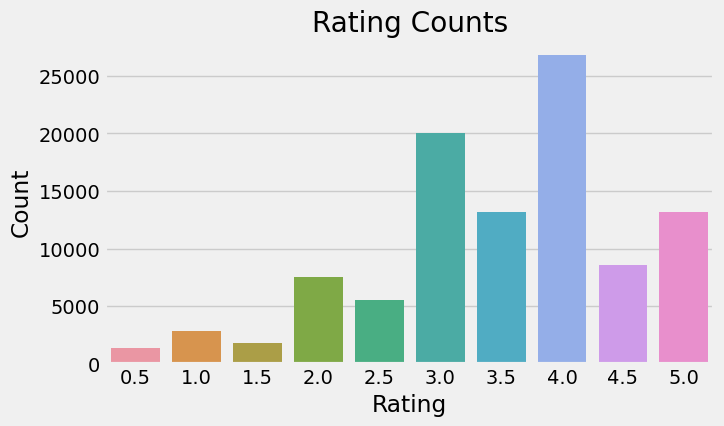

In [14]:
# plotting the rating counts
fig, ax=plt.subplots(figsize=(7,4))
sns.countplot(data=movies , x='rating', ax=ax)
ax.set_ylabel("Count")
ax.set_xlabel("Rating")
ax.set_title("Rating Counts");

> From the graph above; majority of movie ratings in our dataset are 3.0 and above, with 3.0 and 4.0 being the frequently awarded movie ratings.

#### Top Most Watched Movies

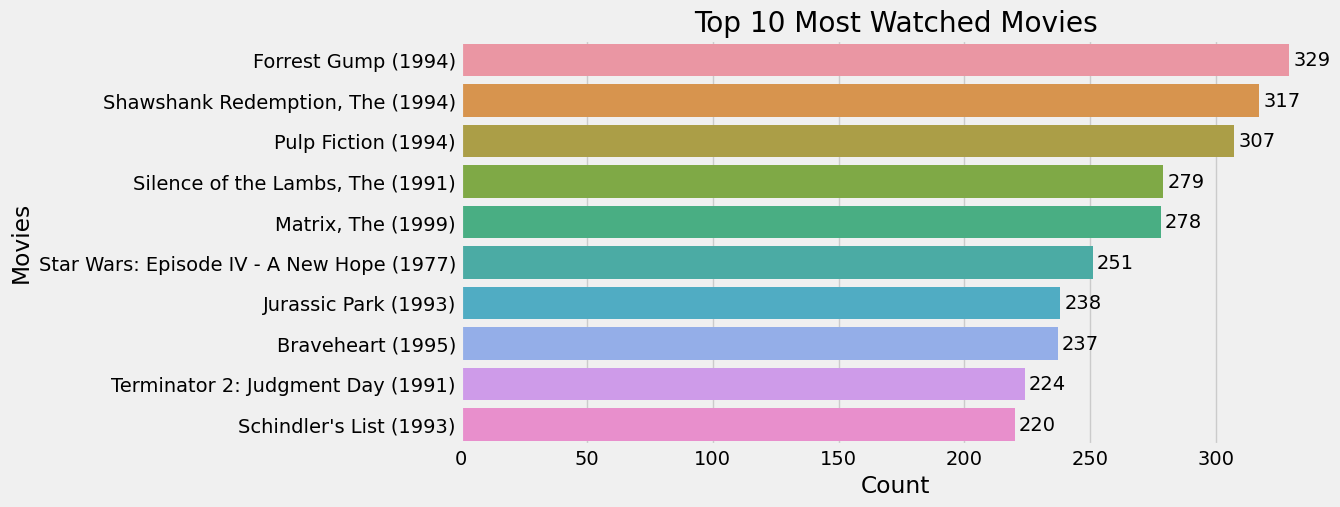

In [15]:
# first we group the data according to movie titles
# and the arrang in descending order of the counts
data=movies.groupby('title')[['userId']].count().sort_values(by='userId',ascending=False)
data

# plotting the grouped data and plotting the top 10 movies
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=data[:10] , x='userId',y=data[:10].index , ax=ax)
ax.set_ylabel("Movies")
ax.set_xlabel("Count")
ax.set_title("Top 10 Most Watched Movies")
ax.bar_label(ax.containers[0],padding=3);

In [16]:
# previewing the genres of the top 5 movies
titles= data[:5].index

movies.loc[ movies.title.isin(titles)].drop_duplicates('movieId')

,userId,movieId,rating,title,genres,avg_rating
16,1,296,3.0,Pulp Fiction (1994),"Comedy,Crime,Drama,Thriller",4.20
20,1,356,4.0,Forrest Gump (1994),"Comedy,Drama,Romance,War",4.16
34,1,593,4.0,"Silence of the Lambs, The (1991)","Crime,Horror,Thriller",4.16
166,1,2571,5.0,"Matrix, The (1999)","Action,Sci-Fi,Thriller",4.19
232,2,318,3.0,"Shawshank Redemption, The (1994)","Crime,Drama",4.43


From the graph above depicts the top 10 most watched movies with  **Forrest Gump (1994)**, **Shawshank Redemption, The (1994)** and **Pulp Fiction (1994)** being the top 3 movies. Also  noting that most occuring genres in those movies are; **crime, drama and thriller**.

#### Top Most Rated Movies

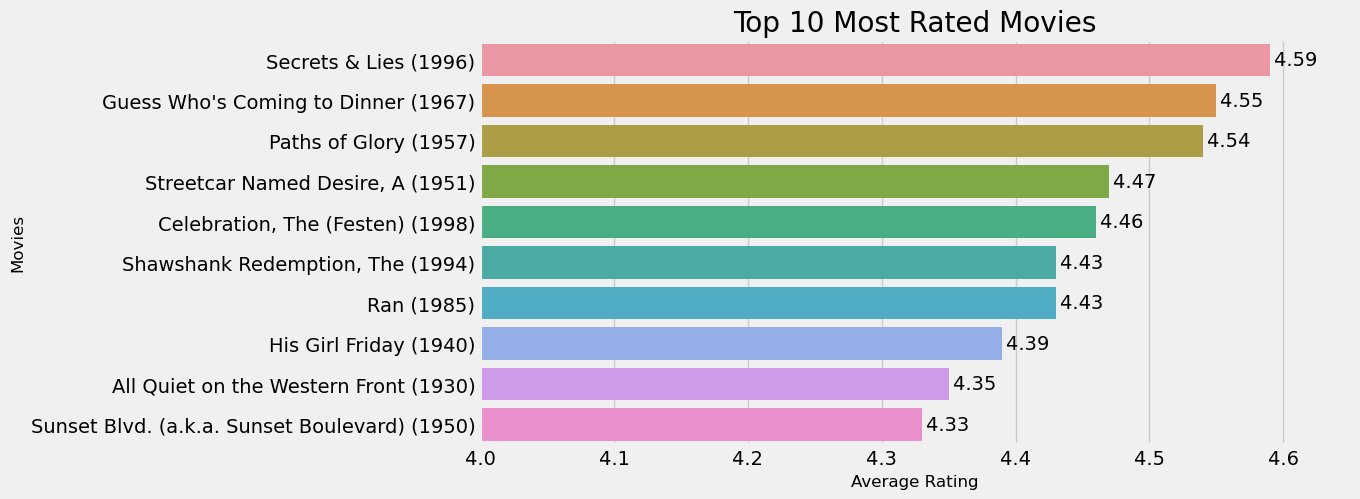

In [17]:
# first grouping the dataframe by 'title'
# then seleting only the movies that have been rated by atleast 10 user
titles=movies.groupby('title')[['userId']].count().sort_values('userId', ascending=False)
titles=titles.loc[titles.userId>=10].index                                     # then extracting the movie titles

# filtering only the obtained movie titles
data= movies[['title','avg_rating']].loc[ movies.title.isin(titles)].drop_duplicates('title')
data=data.sort_values(by='avg_rating', ascending=False)[:10]                  # and sorting according to the average rating 

# the ploting the top 10 movies
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=data , x='avg_rating',y='title' , ax=ax)
ax.set_ylabel("Movies", fontsize=12)
ax.set_xlabel("Average Rating" ,fontsize=12)
ax.set_xlim([4.0 , 4.65])
ax.set_title("Top 10 Most Rated Movies")
ax.bar_label(ax.containers[0] ,padding=3);

In [18]:
# previewing the genres of the top 5 movies
titles= data.title[:5]

movies.loc[ movies.title.isin(titles)].drop_duplicates('movieId')

,userId,movieId,rating,title,genres,avg_rating
4179,27,3451,5.0,Guess Who's Coming to Dinner (1967),Drama,4.55
5014,32,1104,5.0,"Streetcar Named Desire, A (1951)",Drama,4.47
12034,74,1041,5.0,Secrets & Lies (1996),Drama,4.59
12065,74,2360,4.5,"Celebration, The (Festen) (1998)",Drama,4.46
16258,105,1178,4.0,Paths of Glory (1957),"Drama,War",4.54


From the graph above 
**Secrets & Lies (1996)** ,
**Guess Who's Coming to Dinner (1967)** ,
**Paths of Glory (1957)**
are the top 3 highely rated movies, while also noting that they all are of the **Drama** genre. 

#### Genre Counts.

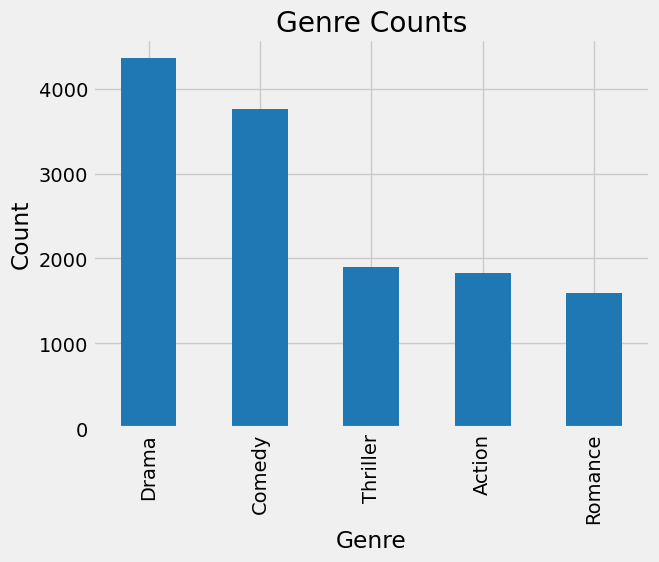

In [88]:
# spliting the genre column into a list of genres
genre= [i for genre in  movies_df.genres for i in genre.split(',')]
genre=np.unique(genre)  # then taking the unique entries only

# creating a dictionary of teh genres and their count
dict_={ g:1 for g in genre}
for k,v in dict_.items():                     # looping over the the dictionary values
    for genre in movies_df.genres:            # looping over the genre column
        if k in genre.split('|'):             # checking if the genre is contained in the column values
            dict_[k]+=1                       # then adds to th genre count
        else: continue
        
dict_= [(k,v)for k,v in dict_.items()]                   #converting the dictionary into a list
dict_=sorted(dict_, key= lambda x: x[1],reverse=True)    # ordering the list of genres in descending order
dict_= {k:v for k,v in dict_[:5]}                        # converting back into an ordered dictionary
pd.Series(data=dict_).plot.bar(color='tab:blue')         # then plotting the values genre counts

plt.ylabel("Count")
plt.xlabel("Genre")
plt.title("Genre Counts")

From the graph; **Darama** , **Comdey**, **Thriller**, **Action** and **Romance** , are the most occurig genres in our dataset

#### Top Active Users.

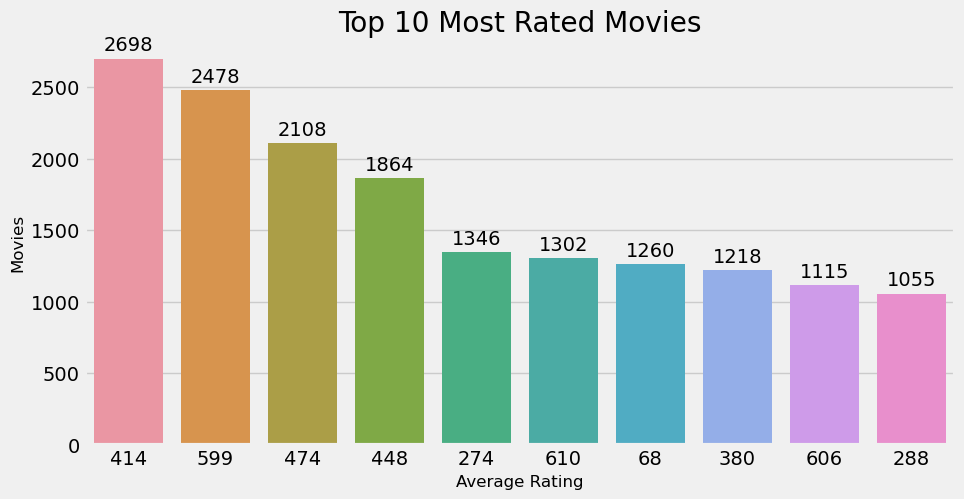

In [19]:
# first grouping the dataframe by 'userId'
users=movies.groupby('userId')[['movieId']].count().sort_values('movieId', ascending=False)
# then seleting only the top 10 users 
users=users[:10]                                    


# the ploting the top 10 users
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(data=users ,y='movieId',x=[str(x) for x in users.index] , ax=ax)
ax.set_ylabel("Movies", fontsize=12)
ax.set_xlabel("Average Rating" ,fontsize=12)
ax.set_title("Top 10 Most Rated Movies")
ax.bar_label(ax.containers[0] ,padding=3);

Fromthe graph above, the users with Id's **414** , **599** and **474** have rated and watched the most movies, each with above 2,000 movies rated. It would increase custormer satisfaction if these users were either rewarded or offered subsidized charges for their subscriptions.

## Modelling
In this section, we will create a recommendation system using the datasets to solve our main problem.
There are different types of recommendation models, in this project we will focus on three types of recommendation systems

* 1. Content-Based Recommender systems
* 2. Collaborative Filtering Systems
* 3. Hybrid Recommender Systems

Now, in each of these categories, we will compare the different models and see which ones perform best. For validation and comparison, we will use the RMSE (root mean squared error) metric, which is how far is the prediction from the true value


### Content-Based Recommender Systems
These are recommender systems that use users' items, features, or previous interests and likes to recommend other items similar to those they liked or interacted with, i.e. the algorithms will simply pick items with similar content to recommend you.

Since in the movies database, there is no description column we will use the **genres** and **title** columns to create a content-based recommender system.

We use the cosine similarity to compare similarities between different movies with their genres, then pick the top n similar movies to recommend. 
> First create a similarity vector that has similarity scores of each movie to the others, this will be used to recommend movies based on name input in the system. To accomplish this we will the **CountVector()** method that will vectorize our genres column

In [20]:
# first we will instatiate the CountVector()
cv=CountVectorizer()

#fit and transform it on our genres column
vector=cv.fit_transform(movies_df['genres'].values).toarray()

# the using the vectorized vector we calculate the similarity scores
similarity=cosine_similarity(vector)
similarity.shape

(9742, 9742)

> Second, w'll create a function that will be used to convert genres into vectors indorder to calculate similarity score of an input genre list with the other rows and return the top n highest scores (most similar genres).

In [21]:
# first we get a dictionary of all unique genres
# looping of the genres column and spliting the genres into individual values
genre= [i for genre in  movies.genres for i in genre.split(',')]

# taking the uniques genres only
genre=np.unique(genre)

print("Unique genres list: ")
genre

Unique genres list: 


array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [22]:
# then we write a function vectorise() that transforms the genres column to vector form.

def vectorise( list_):
    """
    Takes a list of genres and based on the unique genre list returns a vector with same length as unique genres
    and with (0,1) values representing the input list
    """
    return [ 1 if x in list_ else 0 for x in genre   ]

> We will create the content based recommender function that recommends movies based on name or genre inputs .

In [26]:
def content_based( name:str= None , genres: str =None, num:int=5):
    """
    The function takes in the following inputs 
    name -> The input name of the movie,  will be used to recommend movies similar to it. 
        It has a default of None, which will then use the genres paramter
        
    genre -> genres that will be used to recomment movies with similar genres
        It has a default of None which will then result to recommendation of
        the 'Top most watched movies' and 'Top most rated movies'
        
    num -> Is the number of recommendations to produce
        Has a default of 5.
    """

# if the name parameter has a value the this if statement is executed
    if name:
        index_=movies.loc[movies.title== name].index[0]                  # find the index of the input movie
        sim=list(enumerate(similarity[index_]))                          # extract similarity vector of that movie index
        sim=sorted(sim, key=lambda x: x[1], reverse=True)[1:num]         # arrange the vector values in ascending order
        indices= [i[0] for i in sim]                                     # Extract the indices of the top high scores
        print(f"Top {num} Movies Like [{name}]")
                                                                          #use those indices to print the movie
        return movies.loc[indices,('title','rating')].reset_index(drop=True)

# if the name is None then switch to genre parametr
    else:
        # if the genres has passed input values then this if statement runs            
        if genres: 
            input_=[ x.capitalize() for x in genres.split(' ')]            #creates a list of the input genres
    
            vector= vectorise(input_)                                      # uses the vectorised function to create vectors
            vector=np.array(vector).reshape(1,-1)                          # for the input genres and reshapes them
            
            # drops the duplicates in our dataframe to keep only the unique movieId
            df=movies.drop_duplicates('movieId').reset_index(drop=True)    
            
            cos_scores=[]
            for i,vec in enumerate(df.genres):                             # looping over the genre column
                vec=np.array(vectorise(vec)).reshape(1,-1)                 # the vectorising the row entry
                cos_scores.append((i,cosine_similarity(vector,vec)))       # then calculating scores between the row 
                                                                           # and the input genres  
            
            # picks only the top n highest scores
            cos_scores = sorted(cos_scores, key=lambda x: x[1], reverse=True)[:num]

            # extracts the indices of those top n score
            indices = [i[0] for i in cos_scores]
            print(f"Top {num} Best [{genres}] Movies")
            
            # then returns the movie titles,genres and ratings of those indices arranged by their average rating
            rec= df.loc[indices, ('title','avg_rating')].sort_values(by='avg_rating', ascending=False)
            return rec.reset_index(drop=True)
         
        # if both the name and genre are None the top most  watched and rated movies are recommended
        else:
            # using groupby ,pick movies that have been watched by atleast 10 user
            titles=movies.groupby('title')[['userId']].count().sort_values('userId', ascending=False)
            titles=titles.loc[titles.userId>=10].index

            # then filter the dataframe to contain only those most watched movies
            rec= movies[['title','avg_rating']].loc[ movies.title.isin(titles)].drop_duplicates('title')
            # then arrange in decsending order according to the average rating column
            # then selects the top n movies
            rec_=rec.sort_values(by='avg_rating', ascending=False)[:num] 
            
            print(f"\nTop {num} Most Rated Movies \n ------------------------------")
            print(rec_.reset_index(drop=True))      #recommends those top most rated movies
            print()
            # using the names of the most watched movies 
            #filter the daaframes on the n top names 
            rec=movies[['title','avg_rating']].loc[ movies.title.isin(titles[:num])].drop_duplicates('title')            
            print(f'Top {num} Most Watched Movies \n ---------------------------- ')
            
            #then recommends those top most watches movies
            return rec.reset_index(drop=True)   

In [27]:
# testing the function on the default parameters
content_based()


Top 5 Most Rated Movies 
 ------------------------------
                                 title  avg_rating
0                Secrets & Lies (1996)        4.59
1  Guess Who's Coming to Dinner (1967)        4.55
2                Paths of Glory (1957)        4.54
3     Streetcar Named Desire, A (1951)        4.47
4     Celebration, The (Festen) (1998)        4.46

Top 5 Most Watched Movies 
 ---------------------------- 


,title,avg_rating
0,Pulp Fiction (1994),4.20
1,Forrest Gump (1994),4.16
2,"Silence of the Lambs, The (1991)",4.16
3,"Matrix, The (1999)",4.19
4,"Shawshank Redemption, The (1994)",4.43


In [28]:
# assigning 'Pulp Fiction (1994)' movie to the name parameter 
# to get 10 recommendations
content_based(name='Pulp Fiction (1994)', num=10)

Top 10 Movies Like [Pulp Fiction (1994)]


,title,rating
0,Dazed and Confused (1993),4.0
1,Mrs. Doubtfire (1993),3.0
2,Independence Day (a.k.a. ID4) (1996),3.0
3,Citizen Kane (1941),5.0
4,"Abyss, The (1989)",4.0
5,Alien (1979),4.0
6,Psycho (1960),2.0
7,Sneakers (1992),3.0
8,Rocky (1976),5.0


In [29]:
# assigning 'war,action' movie to the genre parameter 
# to get 10 recommendations
content_based(genres= 'war action', num=10)

Top 10 Best [war action] Movies


,title,avg_rating
0,"Duellists, The (1977)",4.17
1,"Bridge at Remagen, The (1969)",4.00
2,American Sniper (2014),3.80
3,Heartbreak Ridge (1986),3.75
4,Iron Eagle (1986),2.29
5,Red Dawn (2012),2.25
6,Missing in Action (1984),2.08
7,Iron Eagle II (1988),1.67
8,Braddock: Missing in Action III (1988),1.25
9,Iron Eagle IV (1995),1.00


The content-based system works perfectly. Then we develop a collaborative filtering system

### Collaborative Filtering
Collaborative filtering is a recommendation system technique, that recommends items to a user on the basis of items that are liked/watched by similar users. It filters out a group of people with tastes similar to a particular user then finds items they like and creates a ranked list of suggestions.

Collaborative Filtering tries to predict the rating score of the movies the user hasn't watched based on the user's rating on watched movies picks the most predicted rating and recommends that movie to the user. There are two types of collaborative filtering models;
1. Neighborhood-Based Models.
2. Model-Based Models

#### Neighborhood-Based Models.
This is a form of collaborative filtering that uses the idea that similar users have similar interests and those users tend to like similar items. With neighborhood-based collaborative filtering methods, we are attempting to quantify just how similar users and items are to one another and get the top N recommendations based on that similarity metric.

Now, we will compare the different neighborhood-based models and see which ones perform best based on the RMSE metric.
Since the number of users is less than the number of items, we are going to use a user-based similarity system.

First, we have to convert the data into **surprise** data format for easy deployment of recommendation systems algorithms.

In [30]:
# using Reader() from surprise module to convert dataframe into surprise dataformat
# instantiating a readerobject
reader=Reader()
# using the reader to read the trainset
dataset= Dataset.load_from_df(ratings_df, reader)

data = dataset.build_full_trainset()
print('Number of users: ', data.n_users, '\n')
print('Number of items: ', data.n_items)

Number of users:  610 

Number of items:  9724


In [31]:
# create the first neighborhood model based on the 30 most similar users
# using pearson similarity metric
knn=KNNBasic(k=30,sim_options={'name':'pearson', 'user_based':True})

# using the cross_validate() to fit the model on 5 folds
results=cross_validate(knn, dataset , cv=5, n_jobs=-1)

#printng the valuation test score
for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())      #calculating mean RMSE od the first model

('test_rmse', array([0.97565074, 0.9722341 , 0.96125637, 0.97789317, 0.98003694]))
('test_mae', array([0.75060223, 0.7532772 , 0.74671977, 0.75426937, 0.75393384]))
('fit_time', (0.8221759796142578, 0.8470728397369385, 0.7874398231506348, 0.8255183696746826, 0.831303596496582))
('test_time', (2.0391273498535156, 2.0862877368927, 2.0851502418518066, 2.1403965950012207, 1.8275177478790283))
-------------------------
Mean RMSE:  0.9734142637769331


In [32]:
# create the second neighborhood model based on the 30 most similar users
# using cosine similarity metric
knn=KNNBasic(k=30,sim_options={'name':"cosine", 'user_based':True})

# using the cross_validate() to fit the model on 5 folds
results=cross_validate(knn, dataset , cv=5, n_jobs=-1)

#printng the valuation test scores
for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())    #calculating mean RMSE od the first model

('test_rmse', array([0.97507268, 0.97547982, 0.9780146 , 0.96815135, 0.96306114]))
('test_mae', array([0.75010566, 0.74927701, 0.75234187, 0.74274038, 0.74462979]))
('fit_time', (0.8301327228546143, 0.8255987167358398, 0.8533291816711426, 0.8626055717468262, 0.6756124496459961))
('test_time', (1.7214648723602295, 1.7451629638671875, 1.7211666107177734, 1.6283738613128662, 1.8358280658721924))
-------------------------
Mean RMSE:  0.9719559183446742


> From the above two models, the **Pearson Similarity** has the lowest RMSE hence will be the used similarity parameter on the reamining models.

In [33]:
# create the anothe neighborhood model based on the 30 most similar users
knn =KNNBaseline(k=30,sim_options={'name':'pearson', 'user_based':True})

# cross validating the model using 5 folds
results=cross_validate(knn, dataset, cv=5, n_jobs=-1)

# printing the validation test scores
for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())


('test_rmse', array([0.88254266, 0.87163425, 0.86907314, 0.87669333, 0.88000244]))
('test_mae', array([0.67252428, 0.66762605, 0.6648638 , 0.67094004, 0.6706214 ]))
('fit_time', (1.04587721824646, 1.0271856784820557, 0.9555718898773193, 0.8916099071502686, 0.8659648895263672))
('test_time', (2.48643159866333, 2.5703773498535156, 2.6595659255981445, 2.653280258178711, 2.060167074203491))
-------------------------
Mean RMSE:  0.8759891647731862


In [34]:
# create the anothe neighborhood model based on the 30 most similar users
knn=KNNWithMeans(k=30,sim_options={'name':'pearson', 'user_based':True})

# cross validating the model using 5 folds
results=cross_validate(knn, dataset, cv=5, n_jobs=-1)

# printing the validation test scores
for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())

('test_rmse', array([0.90152124, 0.89785702, 0.89063411, 0.89822985, 0.89272046]))
('test_mae', array([0.68654834, 0.68495248, 0.6802602 , 0.68361808, 0.67888856]))
('fit_time', (1.3097381591796875, 1.3135230541229248, 1.285181999206543, 1.1529114246368408, 0.7536320686340332))
('test_time', (2.0625665187835693, 2.066718339920044, 1.937255620956421, 1.9945135116577148, 2.004938840866089))
-------------------------
Mean RMSE:  0.896192538275417


The best neighborhood based model has an RMSE of 0.8764 , which means that on the rating scale of 1 to 5 our predictions are off by 0.8764 from the true rating score.

We will compare this RMSE score with the model based models

#### Model Based Models

In [35]:
svd=SVD()
results=cross_validate(svd, dataset, cv=5, n_jobs=-1)

for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())

('test_rmse', array([0.8792491 , 0.86645661, 0.86809974, 0.8810143 , 0.87669849]))
('test_mae', array([0.67619972, 0.66805607, 0.66714469, 0.67532643, 0.67264238]))
('fit_time', (1.5538747310638428, 1.5301945209503174, 1.5611398220062256, 1.505361795425415, 1.3801026344299316))
('test_time', (0.30826544761657715, 0.31407690048217773, 0.3231468200683594, 0.3031344413757324, 0.23275041580200195))
-------------------------
Mean RMSE:  0.874303648995878


The first baseline model-based model with na RMSE of 0.874 has performed better than our best neighborhood based model which had a RMSE of 0.877.
Using the GridSearchCv we will tune the SVD model inorder to improve the training RMSE scores.

In [36]:
# creating the parameter grid
params={'n_factors': [100,200,300],    #number of latent factors
        'n_epochs': [20,30,50],        #number of epoches
        'lr_all': [0.01,0.005],        #learning rate
        'reg_all': [0.01,0.05]}        #regulaeization parameter


# instatiating the GridSearchCv() using the defined parameters
grid=GridSearchCV( SVD , param_grid=params,  cv=5, n_jobs=-1 )

#fiting the grid on the data
grid.fit(dataset)

# printing the obtained best parameters
print(grid.best_score)
print(grid.best_params)

{'rmse': 0.852371870337002, 'mae': 0.6530658998019767}
{'rmse': {'n_factors': 300, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.05}, 'mae': {'n_factors': 300, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.05}}


In [37]:
# using the obtained best parameters to create an SVD() model
svd=SVD( n_factors=300 , n_epochs=50 , lr_all=0.01 , reg_all=0.05 )

# cross valifating the model
results=cross_validate(svd, dataset, cv=5, n_jobs=-1)

# prining the validation test score
for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())

('test_rmse', array([0.85191035, 0.85419734, 0.85302145, 0.85158867, 0.85150725]))
('test_mae', array([0.64979381, 0.65483391, 0.65413814, 0.65309299, 0.65181603]))
('fit_time', (9.732705354690552, 9.73067331314087, 9.792380809783936, 9.540848731994629, 9.058671474456787))
('test_time', (0.31441545486450195, 0.3174562454223633, 0.2992098331451416, 0.3025946617126465, 0.2847287654876709))
-------------------------
Mean RMSE:  0.8524450128664496


Based on this last SVD() model and the best neighborhood model (rmse=0.88), we conclude that the tuned_svd model performed better than the other collaborative filtering models with an RMSE of 0.85. This RMSE score indicates that the model is off by an average of 0.85 on each prediction on a scale of (1-5) output values.

Therefore we will use this svd model to make predictions and thereafter recommendations

In [38]:
# instatiating an SVD model while using the obtained paameters
svd=SVD( n_factors=300 , n_epochs=50 , lr_all=0.01 , reg_all=0.05 )

# fiting the model on the surprise dataformat
svd.fit(data)

In [39]:
# using the model them we try and make a prediction of user 10, on item 5
svd.predict('10','5')

# the predicted rating is 3.5

Prediction(uid='10', iid='5', r_ui=None, est=3.501556983616962, details={'was_impossible': False})

In [40]:
svd.predict(10,5)

Prediction(uid=10, iid=5, r_ui=None, est=2.863781237836076, details={'was_impossible': False})

> First before creating a collaborative filtering function, we will fitrs create a funtion that suggest movies to users to rate them that are filtered based on user defined genre. 

In [59]:
# firts we will define a function that rates movies

def rater( df ,genre:str= None, num: int=5, ):
    """
    The functions takes the following inputs:
    df: DataFrame - a dataframe containing the movie ids, name of movie, and genres
    num: int - number of ratings
    genre: string - a specific genre from which to draw movies
    
    Then randomly draws a movie title from the dataframe for the user to rate
    """
    # assigning our new user a user id
    user_id=df.userId.max()+1                                               
    movies_rated=pd.DataFrame()   # creating an empty dataframe to append the new users rated movies
    
    while num>0:  
        if genre:                                                 # while genre parameter is not None
            genre=genre.capitalize()                              # cpitaize the input genre for format conformity
            movie=df.loc[ df.genres.str.contains(genre)].sample(1) #sampling one movie from containing the input genre
            
        else:                                                      # if no genre input is passed 
            movie=df.sample(1)                                     # then a random movie is sampleform our dataframe
        
        print(movie[['title','rating']])                           # printing thesampled movie title
        print()    
        rating=input("Enter rating of this movie, if you haven't watched Enter: ") #asking for user nput
        
        # a function that ensure correct rating o scale 1-5 is entered
        def checker(rating):
            if (len(rating)!= 0):
                while (int(rating)>5) :
                    print("Enter valid rating, scale of 1-5 or Enter")  
                    rating= input()
                return rating
            else: return rating
        # calling the function to confirm the entered rating 
        rating = checker(rating)
        
        if len(rating) == 0:                                        # if no rating is entered 
            num-=1                                                  # the jumps to select another movie
            continue
        else :                                                      # if a rating is entered 
            movie.loc[:,('userId')]= user_id                        # then the selected movie is assigned the user id
            movie.loc[:,('rating')]=rating
            movies_rated=pd.concat([movies_rated, movie], axis=0)   # the movie is added to our new user rated dataframe
            num-=1                                                  # then anothe movie is suggested till num==0
    return movies_rated.reset_index(drop=True)                      # the rated movied are returned inform of a dataframe

In [60]:
rater(movies,'Action', 3)

                 title  rating
66776  Watchmen (2009)     4.5

Enter rating of this movie, if you haven't watched Enter: 5
                title  rating
54865  Con Air (1997)     3.0

Enter rating of this movie, if you haven't watched Enter: 
                         title  rating
31947  Mr. & Mrs. Smith (2005)     3.5

Enter rating of this movie, if you haven't watched Enter: 2


,userId,movieId,rating,title,genres,avg_rating
0,611,60684,5,Watchmen (2009),"Action,Drama,Mystery,Sci-Fi,Thriller,IMAX",3.99
1,611,33679,2,Mr. & Mrs. Smith (2005),"Action,Adventure,Comedy,Romance",3.28


> With the defined rated() function, we proceed to create a collaborative filtering function  while using our SVD model

In [68]:
def cf_recommender(df,num:int=5, genre:str=None):
    """
    The function takes the following inputs;
    
    df: DataFrame - a dataframe containing the movie ids, name of movie, and genres
    num:int - number of ratings to recommend
    genre - a specific genre input from user
    
    The function the takes user ratings and appends then to the dataframe then fits this new dataframe to the SVD model
    The predicts this users rating on all the movie in the dataframe then selects the top predictions and 
    recomends those movies
    """
    # calling the rater function for user to enter movie ratings
    user_ratings=rater(df=df,num=num, genre=genre)
    
    # then add the user ratings to our df
    df=pd.concat([df,user_ratings],axis=0)

    # convert the nwe dataset into surprise format
    dataset = Dataset.load_from_df(df[['userId','movieId','rating']],reader)
    
    # then fit the surprise data to the SVD
    svd = SVD(n_factors=300 , n_epochs=50 , lr_all=0.01 , reg_all=0.05)
    svd.fit(dataset.build_full_trainset())
    
    # extract the user rating in the ratings dataframe
    user_id=user_ratings['userId'].values[0]
    
    #if a genre input is passed the filter our database according to the entered genre
    if genre:
        df=df.loc[df.genres.str.contains(genre.capitalize())]
        
    #create an empty list to append the model predictions
    user_predictions=[]
    
    # loopin over all the unique movie ids in the dataframe and appending the predictions to user prediction list
    for  iid in df.movieId.unique():
        user_predictions.append( (iid , svd.predict(user_id, iid)[3]))
    
    # sorting the predictions in descending order of the predictions values
    top_pred = sorted(user_predictions , key =lambda x: x[1], reverse=True)
    
    # selecting the top 'num'(number of predictions) prediction indicies
    indices=[i[0] for i in top_pred[:num]]  
    
    #using the extracted indices them extract the movie titles
    rec = df[['movieId','title','rating']].loc[ df['movieId'].isin(indices)].drop_duplicates('movieId')
    return rec[['title','rating']].reset_index(drop=True)  #then retun the movie titles and ratings

In [69]:
cf_recommender(movies,genre='children', num=4)

                       title  rating
36402  Lion King, The (1994)     5.0

Enter rating of this movie, if you haven't watched Enter: 4
                                          title  rating
69653  Charlie and the Chocolate Factory (2005)     3.0

Enter rating of this movie, if you haven't watched Enter: 
               title  rating
20633  Casper (1995)     3.0

Enter rating of this movie, if you haven't watched Enter: 4
             title  rating
72368  Bolt (2008)     4.0

Enter rating of this movie, if you haven't watched Enter: 3


,title,rating
0,Finding Nemo (2003),3.5
1,My Neighbor Totoro (Tonari no Totoro) (1988),2.0
2,Wallace & Gromit: The Wrong Trousers (1993),4.0
3,"Charlie Brown Christmas, A (1965)",4.0


### Hybrid Recommender Systems
In this section, we are going to incorporate both our content-based system and collaborative filtering system inorder to solve the cold start problem.
> **Cold start problem** => It occurs when a recommendation system encounters a new user who has no data/movie references in the recommender's database making it difficult to make recommendations to that user.

To solve this we will combine our collaborative filtering model together with the content-based model. The only difference in this model is that, when the rater function is called and the user doesn't rate any movies because he/she hasn't watched them the content-based model is called to make the recommendations.

In [82]:
# creating a hybrid recommendetion function
# same as the collaborative filtering only have incorperated the content-based model
def hybrid(df,num=5, genre=None):
    # calling the rater() function
    user_ratings=rater(df=df,num=num, genre=genre)
        
    #when th user ratings come back being blank, ie no ratings given
    # then the content-based method is called, which then makes the recommendations
    if len(user_ratings)==0:
        return content_based()
        
    df=pd.concat([df,user_ratings],axis=0)
        
    dataset = Dataset.load_from_df(df[['userId','movieId','rating']],reader)
    svd = SVD(n_factors=300 , n_epochs=50 , lr_all=0.01 , reg_all=0.05)
    svd.fit(dataset.build_full_trainset())
        
    user_id=user_ratings['userId'].values[0]
    if genre:
        df=df.loc[df.genres.str.contains(genre.capitalize())]
            
    user_predictions=[]
    for  iid in df.movieId.unique():
        user_predictions.append( (iid , svd.predict(user_id, iid)[3]))
        
    top_pred = sorted(user_predictions , key =lambda x: x[1], reverse=True) 
    indices=[i[0] for i in top_pred[:num]]  
        
    rec = df[['movieId','title','rating']].loc[ df['movieId'].isin(indices)].drop_duplicates('movieId')
    return rec[['title','rating']].reset_index(drop=True) 

In [130]:
# calling the hybrid function and passing no ratings
hybdrid(movies)

                             title  rating
16065  Next Best Thing, The (2000)     2.0

Enter rating of this movie, if you haven't watched Enter: 
                title  rating
16546  Old Boy (2003)     5.0

Enter rating of this movie, if you haven't watched Enter: 
                        title  rating
96654  Karate Kid, The (1984)     2.0

Enter rating of this movie, if you haven't watched Enter: 
                       title  rating
55570  Murder at 1600 (1997)     3.0

Enter rating of this movie, if you haven't watched Enter: 
                                          title  rating
27647  Ghost Dog: The Way of the Samurai (1999)     5.0

Enter rating of this movie, if you haven't watched Enter: 

Top 5 Most Rated Movies 
 ------------------------------
                                 title  avg_rating
0                Secrets & Lies (1996)        4.59
1  Guess Who's Coming to Dinner (1967)        4.55
2                Paths of Glory (1957)        4.54
3     Streetcar Named Desire, 

,title,avg_rating
0,Pulp Fiction (1994),4.20
1,Forrest Gump (1994),4.16
2,"Silence of the Lambs, The (1991)",4.16
3,"Matrix, The (1999)",4.19
4,"Shawshank Redemption, The (1994)",4.43


* As observed above , with no ratings passed , the system has recomended the most watched movies and the most rated movied which was part of the content-based model.

Consolidating our system all in one class

In [83]:
class RecSystem:
    def __init__(self, movies):
        self.movies=movies
        
    def content_based( self,name:str= None , genres: str =None, num:int=5):
        self.name=name
        self.num=num
        self.genres=genres
        
        if name:
            index_=movies.loc[movies.title== name].index[0]                 
            sim=list(enumerate(similarity[index_]))                          
            sim=sorted(sim, key=lambda x: x[1], reverse=True)[1:num]        
            indices= [i[0] for i in sim]                                    
            print(f"Top {num} Movies Like [{name}]")
                                                                             
            return movies.loc[indices,('title','rating')].reset_index(drop=True)

        else:          
            if genres: 
                input_=[ x.capitalize() for x in genres.split(' ')]            

                vector= vectorise(input_)                                      
                vector=np.array(vector).reshape(1,-1)
                df=movies.drop_duplicates('movieId').reset_index(drop=True)    
                cos_scores=[]
                for i,vec in enumerate(df.genres):                             
                    vec=np.array(vectorise(vec)).reshape(1,-1)                 
                    cos_scores.append((i,cosine_similarity(vector,vec)))  
                cos_scores = sorted(cos_scores, key=lambda x: x[1], reverse=True)[:num]
                indices = [i[0] for i in cos_scores]
                print(f"Top {num} Best [{genres}] Movies")
                rec= df.loc[indices, ('title','avg_rating')].sort_values(by='avg_rating', ascending=False)
                return rec.reset_index(drop=True)

            else:
                titles=movies.groupby('title')[['userId']].count().sort_values('userId', ascending=False)
                titles=titles.loc[titles.userId>=10].index

                rec= movies[['title','avg_rating']].loc[ movies.title.isin(titles)].drop_duplicates('title')
            
                rec_=rec.sort_values(by='avg_rating', ascending=False)[:num] 

                print(f"\nTop {num} Most Rated Movies \n ------------------------------")
                print(rec_.reset_index(drop=True))      #recommends those top most rated movies
                print()
                rec=movies[['title','avg_rating']].loc[ movies.title.isin(titles[:num])].drop_duplicates('title')            
                print(f'Top {num} Most Watched Movies \n ---------------------------- ')

                return rec.reset_index(drop=True)   

    def hybrid(self,df=movies,num=5, genre=None):
        self.df=df
        self.num=num
        self.genre=genre
        
        user_ratings=rater(df=df,num=num, genre=genre)
        if len(user_ratings)==0:
            return content_based()

        df=pd.concat([df,user_ratings],axis=0)

        dataset = Dataset.load_from_df(df[['userId','movieId','rating']],reader)
        svd = SVD(n_factors=300 , n_epochs=50 , lr_all=0.01 , reg_all=0.05)
        svd.fit(dataset.build_full_trainset())

        user_id=user_ratings['userId'].values[0]
        if genre:
            df=df.loc[df.genres.str.contains(genre.capitalize())]

        user_predictions=[]
        for  iid in df.movieId.unique():
            user_predictions.append( (iid , svd.predict(user_id, iid)[3]))

        top_pred = sorted(user_predictions , key =lambda x: x[1], reverse=True) 
        indices=[i[0] for i in top_pred[:num]]  

        rec = df[['movieId','title','rating']].loc[ df['movieId'].isin(indices)].drop_duplicates('movieId')
        return rec[['title','rating']].reset_index(drop=True) 
    
    

In [85]:
# instantiate the recommendation class
rec= RecSystem(movies)
rec.content_based()


Top 5 Most Rated Movies 
 ------------------------------
                                 title  avg_rating
0                Secrets & Lies (1996)        4.59
1  Guess Who's Coming to Dinner (1967)        4.55
2                Paths of Glory (1957)        4.54
3     Streetcar Named Desire, A (1951)        4.47
4     Celebration, The (Festen) (1998)        4.46

Top 5 Most Watched Movies 
 ---------------------------- 


,title,avg_rating
0,Pulp Fiction (1994),4.20
1,Forrest Gump (1994),4.16
2,"Silence of the Lambs, The (1991)",4.16
3,"Matrix, The (1999)",4.19
4,"Shawshank Redemption, The (1994)",4.43


In [86]:
rec.hybrid()

                                                   title  rating
59397  Star Wars: Episode V - The Empire Strikes Back...     4.5

Enter rating of this movie, if you haven't watched Enter: 
                  title  rating
17150  Mask, The (1994)     3.0

Enter rating of this movie, if you haven't watched Enter: 
                          title  rating
20159  Road to Perdition (2002)     2.5

Enter rating of this movie, if you haven't watched Enter: 
                              title  rating
43337  Spanish Prisoner, The (1997)     4.0

Enter rating of this movie, if you haven't watched Enter: 
                               title  rating
95238  Breakfast at Tiffany's (1961)     2.0

Enter rating of this movie, if you haven't watched Enter: 

Top 5 Most Rated Movies 
 ------------------------------
                                 title  avg_rating
0                Secrets & Lies (1996)        4.59
1  Guess Who's Coming to Dinner (1967)        4.55
2                Paths of Glory (1957

,title,avg_rating
0,Pulp Fiction (1994),4.20
1,Forrest Gump (1994),4.16
2,"Silence of the Lambs, The (1991)",4.16
3,"Matrix, The (1999)",4.19
4,"Shawshank Redemption, The (1994)",4.43


## Conclusions

1. Through EDA it was noted that, **Drama**, **Crime** and **Thriller** movies are the most watched and rated movies, meaning that they have the most popularity.
***
2. Also 
**Secrets & Lies (1996)** , **Guess Who's Coming to Dinner (1967)** , **Paths of Glory (1957)** ,  **Forrest Gump (1994)** , **Shawshank Redemption, The (1994)** and **Pulp Fiction (1994)** are the most ranked and watched movies. Therefore they would be of greate influence if they are dislayed on the cover page/ landing page/ index page of the StreamHd platform.
***
3. The users with Id's **414** , **599** and **474** have rated and watched the most movies, each with above 2,000 movies rated. It would increase custormer satisfaction if these users were either rewarded or offered subsidized charges for their subscriptions.
***
4. The best user rating predictive model had an RMSE of 0.85, which means that the model is off by 0.85 points on each rating prediction on a scale of (1-5) rating values.


## Recommendations